In [134]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from matplotlib.pyplot import figure
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
covid_preg = pd.read_csv(r"C:\Users\admin\Mental Health in Pregnancy During Covid_19.csv")

In [3]:
covid_preg.shape

(10772, 16)

In [4]:
covid_preg.isnull().sum()

OSF_ID                                           0
Maternal_Age                                   111
Household_Income                               251
Maternal_Education                             177
Edinburgh_Postnatal_Depression_Scale          1174
PROMIS_Anxiety                                1206
Gestational_Age_At_Birth                      4038
Delivery_Date(converted to month and year)    4039
Birth_Length                                  5292
Birth_Weight                                  4694
Delivery_Mode                                 5235
NICU_Stay                                     5238
Language                                         0
Threaten_Life                                  896
Threaten_Baby_Danger                           904
Threaten_Baby_Harm                             892
dtype: int64

In [5]:
covid_preg=covid_preg.drop(columns=['OSF_ID','Language'])

In [6]:
column_to_check = ['Edinburgh_Postnatal_Depression_Scale','PROMIS_Anxiety','Gestational_Age_At_Birth','Delivery_Date(converted to month and year)','Birth_Length','Birth_Weight','Delivery_Mode','NICU_Stay','Threaten_Life','Threaten_Baby_Danger','Threaten_Baby_Harm']
covid_preg['All_Null'] = covid_preg[column_to_check].isnull().all(axis=1)

In [7]:
covid_preg = covid_preg.loc[~covid_preg['All_Null'], :]

In [8]:
pd.set_option('display.max_columns',None)

In [9]:
covid_preg=covid_preg.drop(columns = ['All_Null'])

In [10]:
month=covid_preg['Delivery_Date(converted to month and year)'].str.strip().str.split(r'([A-Za-z]+)(\d{4})').str.get(1)

In [11]:
year=covid_preg['Delivery_Date(converted to month and year)'].str.strip().str.split(r'([A-Za-z]+)(\d{4})').str.get(2)

In [12]:
covid_preg.insert(7,'Delivery_Month',month)
covid_preg.insert(8,'Delivery_Year',year)

In [13]:
covid_preg=covid_preg.drop(columns = ['Delivery_Date(converted to month and year)'])

In [14]:
covid_preg.duplicated().sum()

0

In [15]:
(covid_preg.isnull().sum()/len(covid_preg))*100

Maternal_Age                             0.864749
Household_Income                         2.176448
Maternal_Education                       1.486592
Edinburgh_Postnatal_Depression_Scale     6.743101
PROMIS_Anxiety                           7.054023
Gestational_Age_At_Birth                34.570540
Delivery_Month                          34.580257
Delivery_Year                           34.580257
Birth_Length                            46.754761
Birth_Weight                            40.944423
Delivery_Mode                           46.200933
NICU_Stay                               46.230082
Threaten_Life                            4.041974
Threaten_Baby_Danger                     4.119705
Threaten_Baby_Harm                       4.003109
dtype: float64

In [16]:
covid_preg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10292 entries, 0 to 10771
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Maternal_Age                          10203 non-null  float64
 1   Household_Income                      10068 non-null  object 
 2   Maternal_Education                    10139 non-null  object 
 3   Edinburgh_Postnatal_Depression_Scale  9598 non-null   float64
 4   PROMIS_Anxiety                        9566 non-null   float64
 5   Gestational_Age_At_Birth              6734 non-null   float64
 6   Delivery_Month                        6733 non-null   object 
 7   Delivery_Year                         6733 non-null   object 
 8   Birth_Length                          5480 non-null   float64
 9   Birth_Weight                          6078 non-null   float64
 10  Delivery_Mode                         5537 non-null   object 
 11  NICU_Stay           

# Numerical Graphs

In [17]:
numerical_df = covid_preg.select_dtypes(include = ['number'])

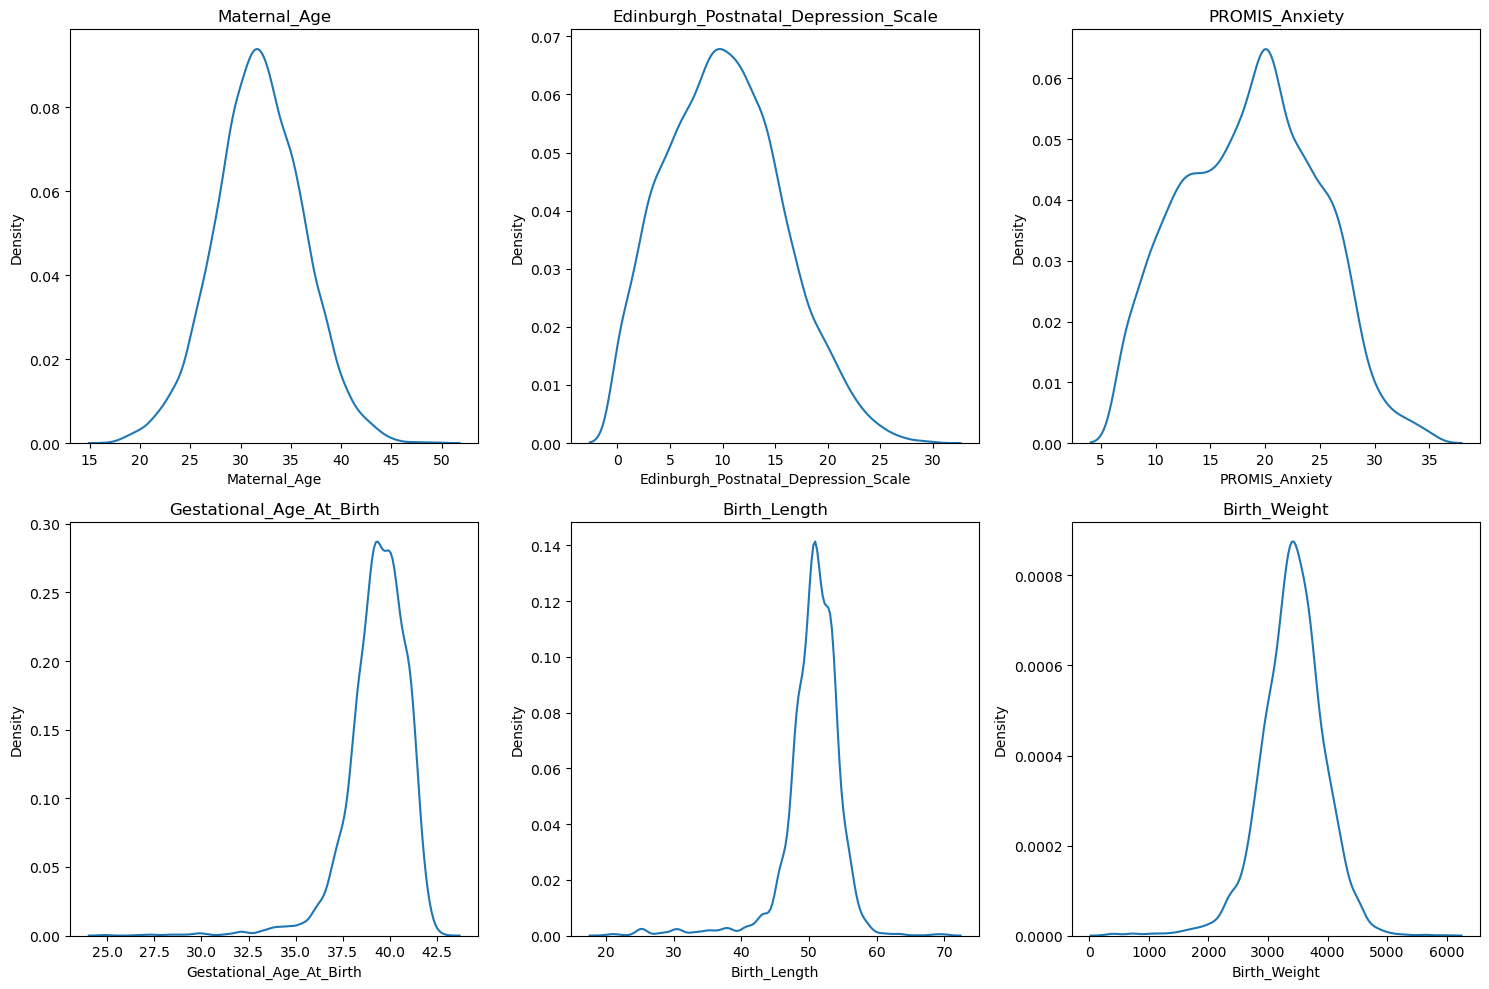

In [18]:
fix, axs = plt.subplots(2,3, figsize=(15,10))
axs= axs.flatten()

for i, col in enumerate(numerical_df.columns):
    if i<6:
        sns.kdeplot(data=numerical_df[col],ax=axs[i])
        axs[i].set_title(col)
    
plt.tight_layout()
plt.show()

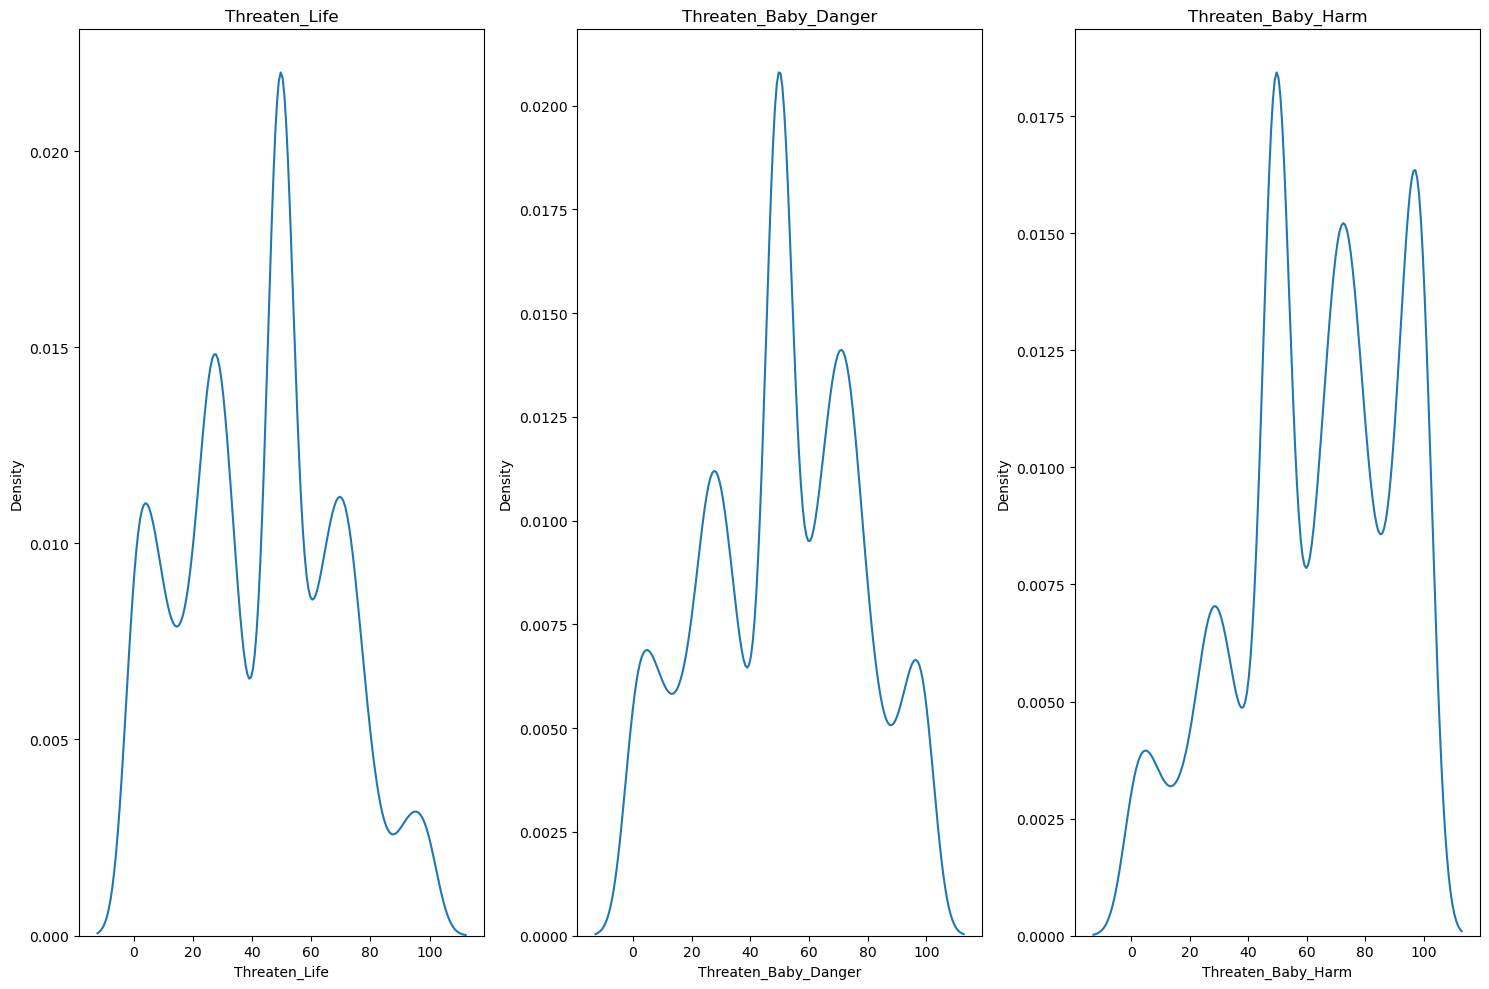

In [19]:
fix, axs = plt.subplots(1,3, figsize=(15,10))
axs= axs.flatten()

sns.kdeplot(data=numerical_df["Threaten_Life"],ax=axs[0])
axs[0].set_title('Threaten_Life')

sns.kdeplot(data=numerical_df["Threaten_Baby_Danger"],ax=axs[1])
axs[1].set_title('Threaten_Baby_Danger')

sns.kdeplot(data=numerical_df["Threaten_Baby_Harm"],ax=axs[2])
axs[2].set_title('Threaten_Baby_Harm')

    
plt.tight_layout()
plt.show()

G:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


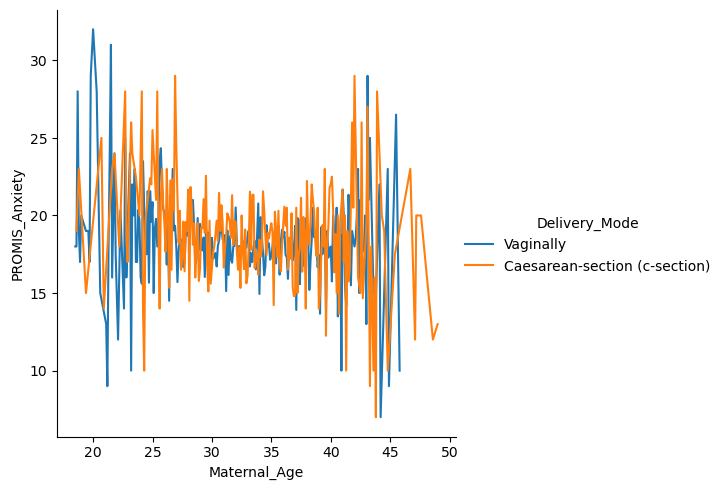

In [20]:
sns.relplot(
    data=covid_preg, kind="line",
    x="Maternal_Age", y="PROMIS_Anxiety", hue="Delivery_Mode",errorbar=None
)

G:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


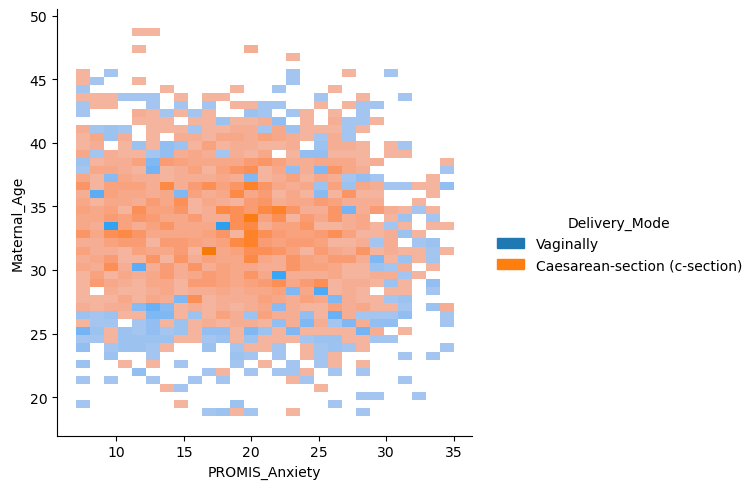

In [21]:
sns.displot(covid_preg, x="PROMIS_Anxiety", y="Maternal_Age", hue="Delivery_Mode")
plt.show()

In [22]:
covid_preg['Household_Income'].value_counts()

Household_Income
$70,000-$99,999        2006
$100,000 -$124,999     1886
$40,000-$69,999        1348
$125,000- $149,999     1315
$150,000 - $174,999    1115
$200,000+               977
$175,000- $199,999      641
$20,000- $39,999        561
Less than $20, 000      219
Name: count, dtype: int64

In [23]:
covid_preg['Delivery_Mode'].value_counts()

Delivery_Mode
Vaginally                        3904
Caesarean-section (c-section)    1633
Name: count, dtype: int64

In [24]:
covid_preg['Maternal_Education'].value_counts()

Maternal_Education
Undergraduate degree             3979
College/trade school             2588
Masters degree                   1849
High school diploma               835
Doctoral Degree                   767
Less than high school diploma     121
Name: count, dtype: int64

In [25]:
covid_preg['NICU_Stay'].value_counts()

NICU_Stay
No     4986
Yes     548
Name: count, dtype: int64

In [26]:
covid_preg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10292 entries, 0 to 10771
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Maternal_Age                          10203 non-null  float64
 1   Household_Income                      10068 non-null  object 
 2   Maternal_Education                    10139 non-null  object 
 3   Edinburgh_Postnatal_Depression_Scale  9598 non-null   float64
 4   PROMIS_Anxiety                        9566 non-null   float64
 5   Gestational_Age_At_Birth              6734 non-null   float64
 6   Delivery_Month                        6733 non-null   object 
 7   Delivery_Year                         6733 non-null   object 
 8   Birth_Length                          5480 non-null   float64
 9   Birth_Weight                          6078 non-null   float64
 10  Delivery_Mode                         5537 non-null   object 
 11  NICU_Stay           

In [27]:
covid_preg['Gestational_Age_At_Birth'] = np.round(covid_preg['Gestational_Age_At_Birth']/4.33,2)

In [28]:
covid_preg['Birth_Weight']

0        3431.0
1           NaN
3        2534.0
4        3714.0
5           NaN
          ...  
10766       NaN
10767       NaN
10769       NaN
10770       NaN
10771    4196.0
Name: Birth_Weight, Length: 10292, dtype: float64

In [29]:
#Healthy or Not Healthy based on Weight 
def weight_health(row):
    if pd.isnull(row['Birth_Weight']):
        return 'No Data Available'
    elif row['Birth_Weight'] >= 2600 and  row['Birth_Weight']<4000:
        return 'Healthy'
    else:
        return 'Unhealthy'

In [30]:
def length_health(row):
    if pd.isnull(row['Birth_Length']):
        return 'No Data Available'
    elif row['Birth_Length'] >= 39 and  row['Birth_Length']<61:
        return 'Healthy'
    else:
        return 'Unhealthy'

In [31]:
birth_weight=covid_preg.apply(weight_health,axis=1)

In [32]:
birth_length=covid_preg.apply(length_health,axis=1)

In [33]:
covid_preg.columns

Index(['Maternal_Age', 'Household_Income', 'Maternal_Education',
       'Edinburgh_Postnatal_Depression_Scale', 'PROMIS_Anxiety',
       'Gestational_Age_At_Birth', 'Delivery_Month', 'Delivery_Year',
       'Birth_Length', 'Birth_Weight', 'Delivery_Mode', 'NICU_Stay',
       'Threaten_Life', 'Threaten_Baby_Danger', 'Threaten_Baby_Harm'],
      dtype='object')

In [34]:
covid_preg.insert(10,'Weight_health',birth_weight)
covid_preg.insert(11,'Height_health',birth_length)

G:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


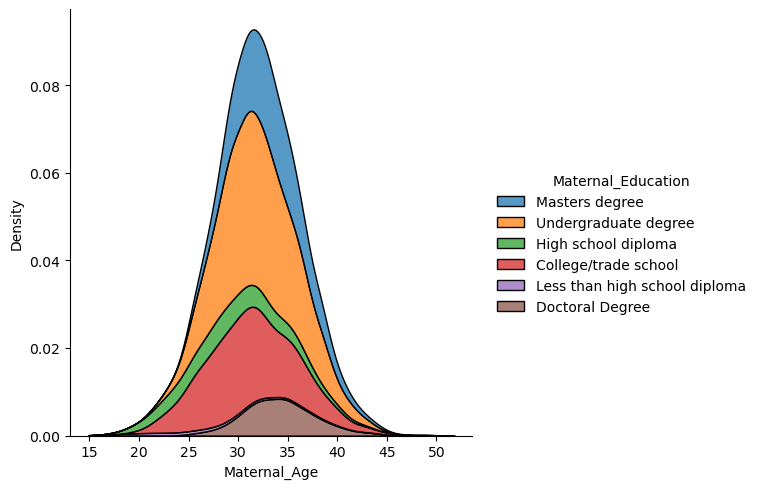

In [35]:
sns.displot(data=covid_preg, x="Maternal_Age", hue="Maternal_Education", multiple="stack", kind="kde")

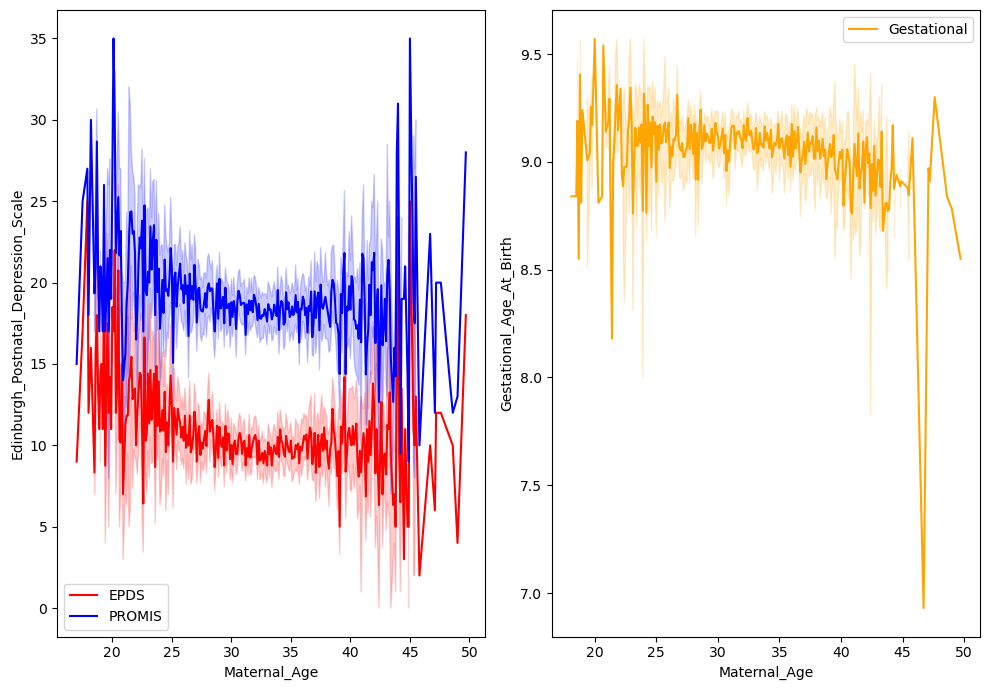

In [36]:
fig,axs = plt.subplots(1,2,figsize=(10,7))
sns.lineplot(data=covid_preg,x ='Maternal_Age',y='Edinburgh_Postnatal_Depression_Scale',ax=axs[0],color='red',label ='EPDS')
sns.lineplot(data=covid_preg,x ='Maternal_Age',y='PROMIS_Anxiety',ax=axs[0],color='blue',label ='PROMIS')
sns.lineplot(data=covid_preg,x ='Maternal_Age',y='Gestational_Age_At_Birth',ax=axs[1],color='orange',label ='Gestational')
plt.tight_layout()
plt.show()

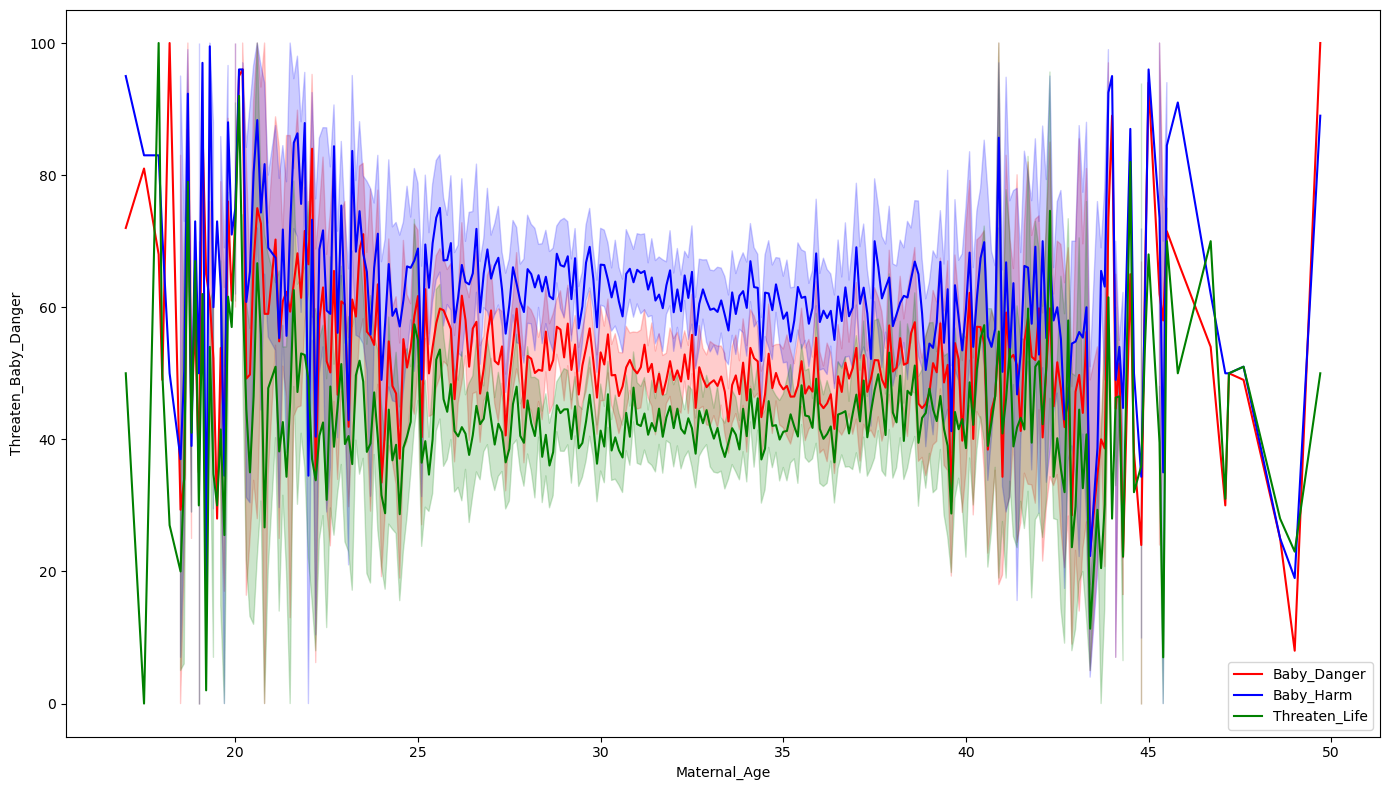

In [37]:
fig, axs = plt.subplots(1, 1, figsize=(14, 8))
sns.lineplot(data=covid_preg,x ='Maternal_Age',y='Threaten_Baby_Danger',ax=axs,color='red',label ='Baby_Danger')
sns.lineplot(data=covid_preg,x ='Maternal_Age',y='Threaten_Baby_Harm',ax=axs,color='blue',label ='Baby_Harm')
sns.lineplot(data=covid_preg,x ='Maternal_Age',y='Threaten_Life',ax=axs,color='green',label ='Threaten_Life')
plt.tight_layout()
plt.show()

In [38]:
covid_preg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10292 entries, 0 to 10771
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Maternal_Age                          10203 non-null  float64
 1   Household_Income                      10068 non-null  object 
 2   Maternal_Education                    10139 non-null  object 
 3   Edinburgh_Postnatal_Depression_Scale  9598 non-null   float64
 4   PROMIS_Anxiety                        9566 non-null   float64
 5   Gestational_Age_At_Birth              6734 non-null   float64
 6   Delivery_Month                        6733 non-null   object 
 7   Delivery_Year                         6733 non-null   object 
 8   Birth_Length                          5480 non-null   float64
 9   Birth_Weight                          6078 non-null   float64
 10  Weight_health                         10292 non-null  object 
 11  Height_health       

G:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


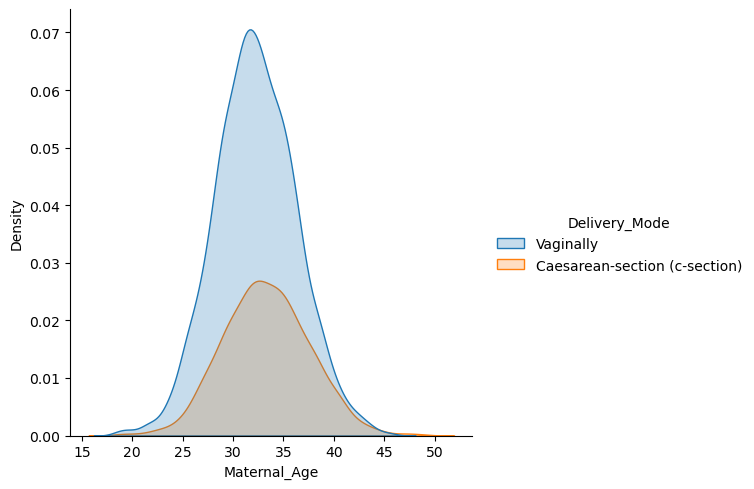

In [39]:
sns.displot(covid_preg, x="Maternal_Age", hue="Delivery_Mode", kind="kde", fill=True)
plt.show()

G:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


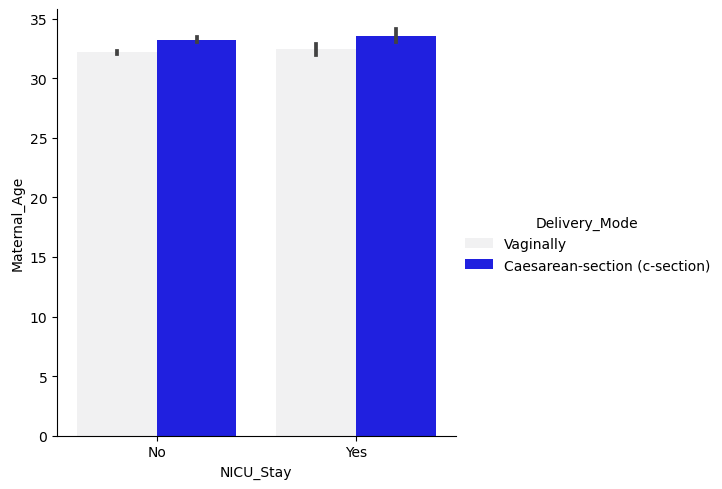

In [40]:
sns.catplot(data=covid_preg, x="NICU_Stay", y="Maternal_Age", hue="Delivery_Mode",color='blue', kind="bar")
plt.show()

In [41]:
new_df = covid_preg[covid_preg['Delivery_Mode'].notnull()]

In [42]:
new_df= covid_preg[['Maternal_Age','Delivery_Mode']]


def age_bin(row):
    if(row['Maternal_Age'] <23):
        return 'Underage'
    elif (row['Maternal_Age'] >=23 and row['Maternal_Age'] <38):
        return 'Healthy Age'
    else:
        return 'Old_Age'

In [43]:
new_df['Age Category'] =new_df.apply(age_bin,axis=1)

C:\Users\admin\AppData\Local\Temp\ipykernel_6968\1854441957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Age Category'] =new_df.apply(age_bin,axis=1)


In [44]:
new_df

,Maternal_Age,Delivery_Mode,Age Category
0,38.3,Vaginally,Old_Age
1,34.6,NaN,Healthy Age
3,28.8,Vaginally,Healthy Age
4,36.5,Caesarean-section (c-section),Healthy Age
5,38.3,NaN,Old_Age
...,...,...,...
10766,32.7,NaN,Healthy Age
10767,38.3,NaN,Old_Age
10769,27.7,NaN,Healthy Age
10770,23.0,NaN,Healthy Age


In [45]:
new_df.value_counts()

Maternal_Age  Delivery_Mode                  Age Category
31.3          Vaginally                      Healthy Age     84
32.3          Vaginally                      Healthy Age     73
31.8          Vaginally                      Healthy Age     72
32.8          Vaginally                      Healthy Age     71
30.3          Vaginally                      Healthy Age     67
                                                             ..
23.2          Caesarean-section (c-section)  Healthy Age      1
23.1          Vaginally                      Healthy Age      1
22.7          Vaginally                      Underage         1
              Caesarean-section (c-section)  Underage         1
49.0          Caesarean-section (c-section)  Old_Age          1
Name: count, Length: 453, dtype: int64

In [46]:
new_df=new_df.groupby('Age Category')['Delivery_Mode'].value_counts().reset_index()

In [47]:
new_df

,Age Category,Delivery_Mode,count
0,Healthy Age,Vaginally,3534
1,Healthy Age,Caesarean-section (c-section),1381
2,Old_Age,Vaginally,327
3,Old_Age,Caesarean-section (c-section),236
4,Underage,Vaginally,43
5,Underage,Caesarean-section (c-section),16


In [48]:
#Hypothesis yaha karna bey 

In [49]:
House_income_relation = covid_preg[covid_preg['Delivery_Mode'].notnull()]

In [50]:
House_income_relation.groupby('Household_Income')['Delivery_Mode'].value_counts()

Household_Income     Delivery_Mode                
$100,000 -$124,999   Vaginally                        762
                     Caesarean-section (c-section)    320
$125,000- $149,999   Vaginally                        555
                     Caesarean-section (c-section)    247
$150,000 - $174,999  Vaginally                        483
                     Caesarean-section (c-section)    214
$175,000- $199,999   Vaginally                        297
                     Caesarean-section (c-section)    112
$20,000- $39,999     Vaginally                        134
                     Caesarean-section (c-section)     59
$200,000+            Vaginally                        432
                     Caesarean-section (c-section)    194
$40,000-$69,999      Vaginally                        437
                     Caesarean-section (c-section)    165
$70,000-$99,999      Vaginally                        708
                     Caesarean-section (c-section)    272
Less than $20, 000   

In [51]:
Income_NICU = covid_preg[covid_preg['NICU_Stay'].notnull()]

In [52]:
Income_NICU.groupby('Household_Income')['NICU_Stay'].value_counts()

Household_Income     NICU_Stay
$100,000 -$124,999   No           981
                     Yes          100
$125,000- $149,999   No           705
                     Yes           97
$150,000 - $174,999  No           645
                     Yes           52
$175,000- $199,999   No           368
                     Yes           41
$20,000- $39,999     No           169
                     Yes           24
$200,000+            No           572
                     Yes           54
$40,000-$69,999      No           536
                     Yes           65
$70,000-$99,999      No           884
                     Yes           95
Less than $20, 000   No            52
                     Yes            3
Name: count, dtype: int64

In [53]:
Income_NICU.groupby('Household_Income')['Weight_health'].value_counts()
#The unhealthy number varies around 17% to 20%

Household_Income     Weight_health    
$100,000 -$124,999   Healthy              893
                     Unhealthy            188
$125,000- $149,999   Healthy              672
                     Unhealthy            130
$150,000 - $174,999  Healthy              577
                     Unhealthy            120
$175,000- $199,999   Healthy              342
                     Unhealthy             66
                     No Data Available      1
$20,000- $39,999     Healthy              151
                     Unhealthy             42
$200,000+            Healthy              521
                     Unhealthy            105
$40,000-$69,999      Healthy              484
                     Unhealthy            116
                     No Data Available      1
$70,000-$99,999      Healthy              808
                     Unhealthy            171
Less than $20, 000   Healthy               44
                     Unhealthy             11
Name: count, dtype: int64

<Axes: xlabel='PROMIS_Anxiety', ylabel='Density'>

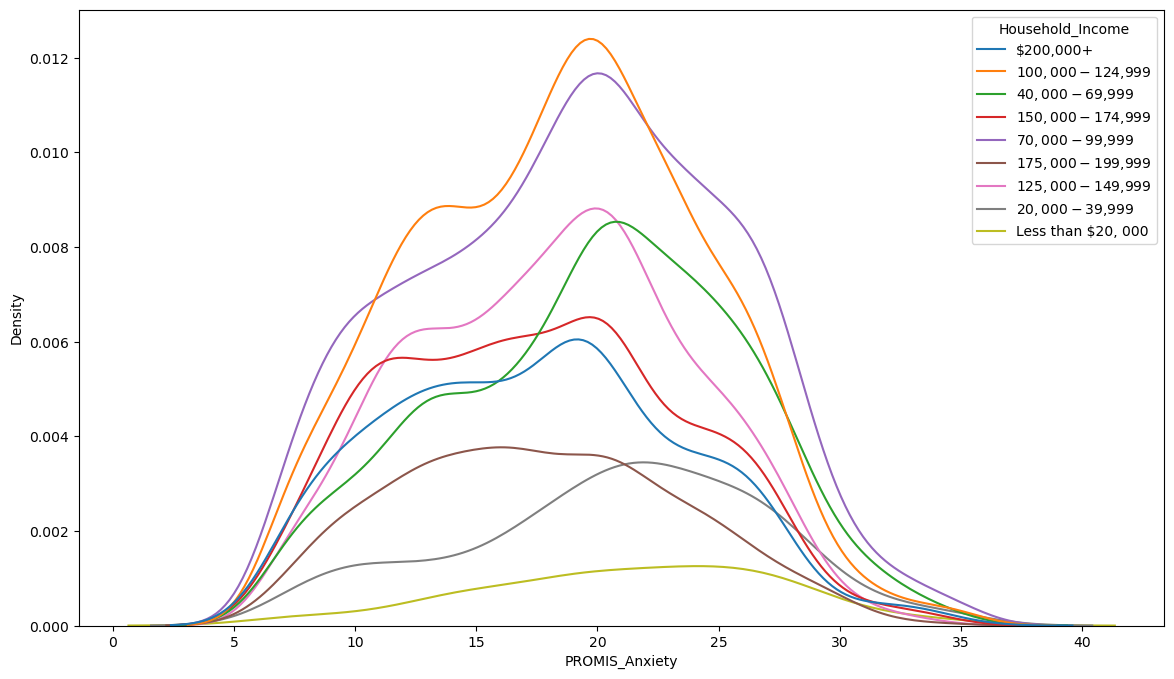

In [54]:
fig, axs = plt.subplots(1, 1, figsize=(14, 8))
sns.kdeplot(data=covid_preg, x="PROMIS_Anxiety", hue="Household_Income", ax=axs)

<Axes: xlabel='Edinburgh_Postnatal_Depression_Scale', ylabel='Density'>

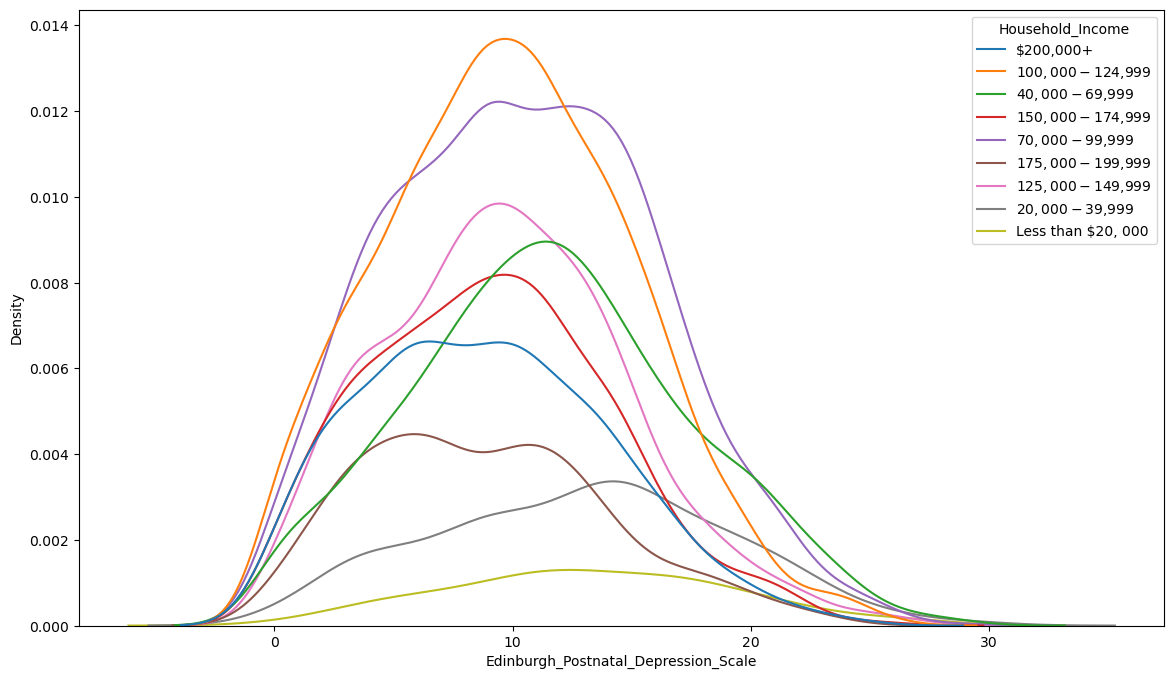

In [55]:
fig, axs = plt.subplots(1, 1, figsize=(14, 8))
sns.kdeplot(data=covid_preg, x="Edinburgh_Postnatal_Depression_Scale", hue="Household_Income", ax=axs)

In [56]:
covid_preg.groupby('Household_Income')['Threaten_Life'].mean().reset_index().sort_values('Threaten_Life',ascending = False)

,Household_Income,Threaten_Life
8,"Less than $20, 000",50.771028
4,"$20,000- $39,999",47.727106
6,"$40,000-$69,999",45.215491
7,"$70,000-$99,999",42.388205
0,"$100,000 -$124,999",41.783813
2,"$150,000 - $174,999",41.392463
1,"$125,000- $149,999",40.482463
3,"$175,000- $199,999",40.062300
5,"$200,000+",39.456635


In [57]:
covid_preg.groupby('Household_Income')['Threaten_Baby_Danger'].mean().reset_index().sort_values('Threaten_Baby_Danger',ascending = False)

,Household_Income,Threaten_Baby_Danger
8,"Less than $20, 000",60.276995
4,"$20,000- $39,999",58.310786
6,"$40,000-$69,999",53.740031
7,"$70,000-$99,999",52.033933
0,"$100,000 -$124,999",50.288200
1,"$125,000- $149,999",48.904762
2,"$150,000 - $174,999",48.456382
3,"$175,000- $199,999",46.923200
5,"$200,000+",46.885057


In [58]:
covid_preg.groupby('Household_Income')['Threaten_Baby_Harm'].mean().reset_index().sort_values('Threaten_Baby_Harm',ascending = False)

,Household_Income,Threaten_Baby_Harm
8,"Less than $20, 000",66.985915
4,"$20,000- $39,999",66.718464
7,"$70,000-$99,999",63.633470
6,"$40,000-$69,999",63.476263
0,"$100,000 -$124,999",62.386327
1,"$125,000- $149,999",62.027301
3,"$175,000- $199,999",60.517572
5,"$200,000+",60.134937
2,"$150,000 - $174,999",59.983501


<Axes: xlabel='Threaten_Life', ylabel='Density'>

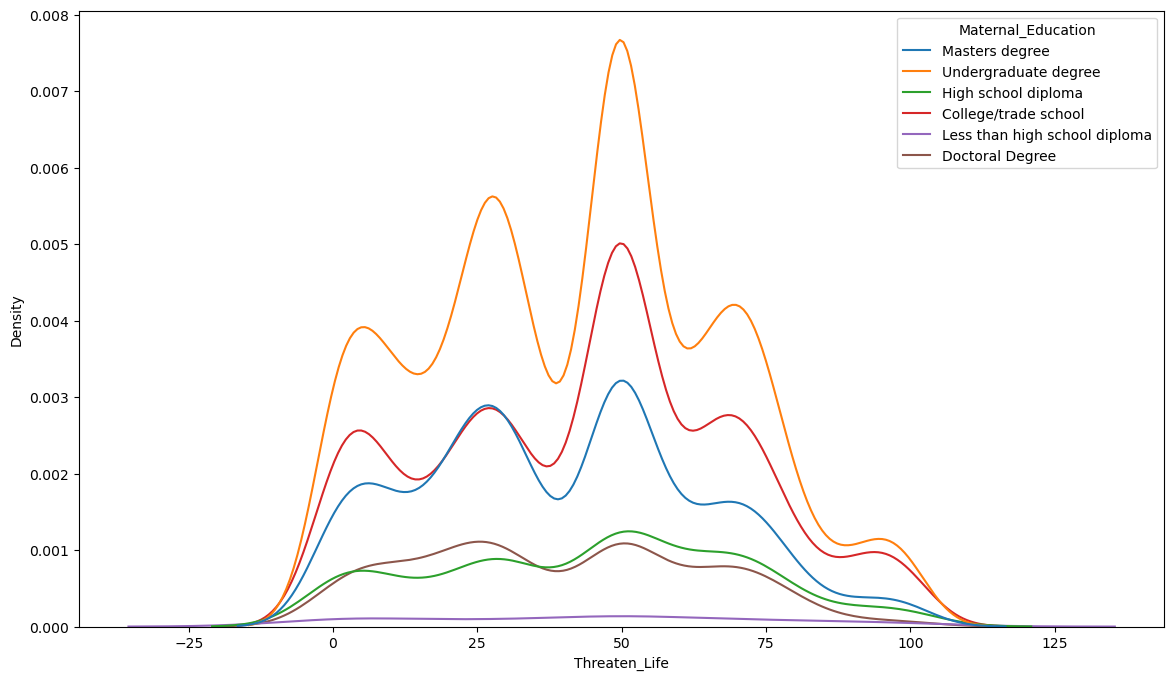

In [59]:
fig, axs = plt.subplots(1, 1, figsize=(14, 8))
sns.kdeplot(data=covid_preg, x="Threaten_Life", hue="Maternal_Education", ax=axs)                

G:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


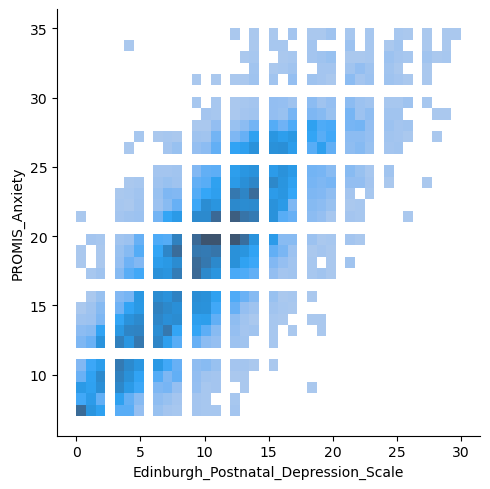

In [60]:
sns.displot(data=covid_preg, x="Edinburgh_Postnatal_Depression_Scale", y="PROMIS_Anxiety")
plt.show()

<Axes: xlabel='Birth_Length', ylabel='Household_Income'>

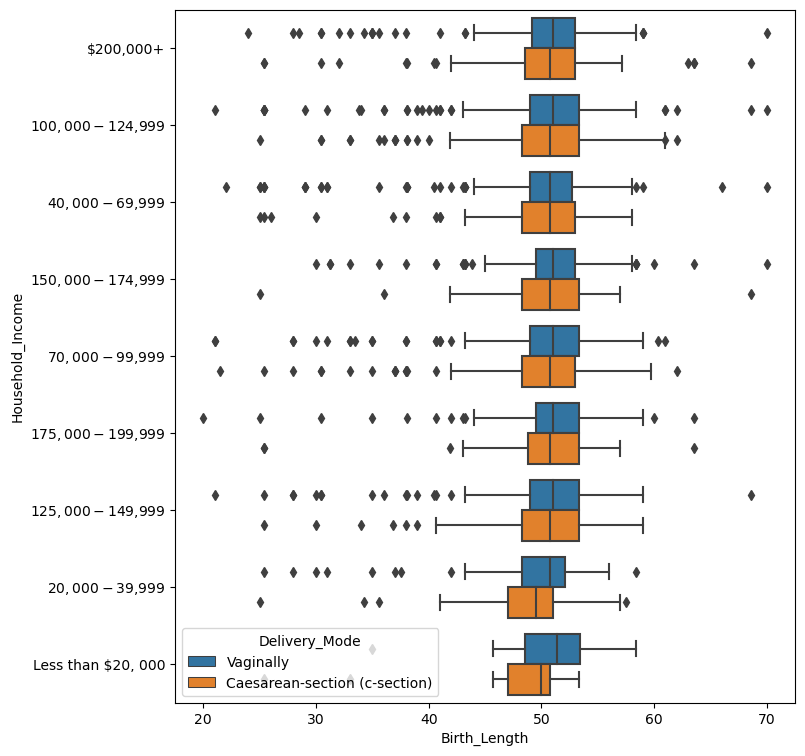

In [61]:
fig, axs = plt.subplots(1, 1, figsize=(8, 9))
sns.boxplot(data=covid_preg, x="Birth_Length", y="Household_Income", hue="Delivery_Mode")

<Axes: xlabel='Birth_Weight', ylabel='Household_Income'>

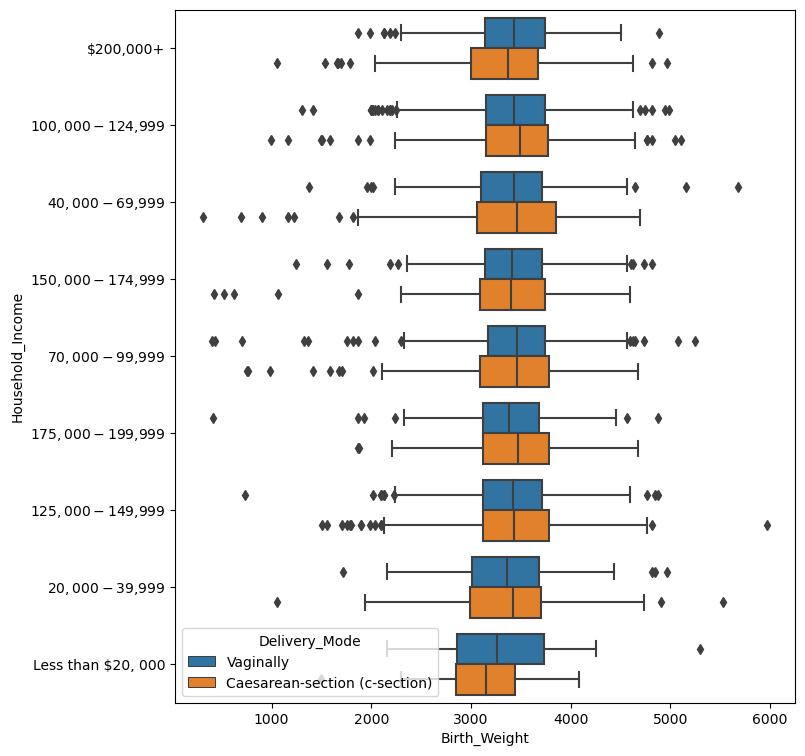

In [62]:
fig, axs = plt.subplots(1, 1, figsize=(8,9))

sns.boxplot(data=covid_preg, x="Birth_Weight", y="Household_Income", hue="Delivery_Mode")

In [63]:
covid_preg.sample(3)

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Month,Delivery_Year,Birth_Length,Birth_Weight,Weight_health,Height_health,Delivery_Mode,NICU_Stay,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
8018,26.0,"$125,000- $149,999",Undergraduate degree,9.0,12.0,9.6,Nov,2020,53.0,3345.0,Healthy,Healthy,Vaginally,No,7.0,0.0,38.0
5006,26.3,"$20,000- $39,999",Less than high school diploma,17.0,26.0,NaN,NaN,NaN,NaN,NaN,No Data Available,No Data Available,NaN,NaN,50.0,70.0,92.0
5512,41.3,"$125,000- $149,999",Undergraduate degree,15.0,22.0,9.4,May,2021,53.0,3573.0,Healthy,Healthy,Vaginally,No,50.0,100.0,100.0


<Axes: xlabel='Gestational_Age_At_Birth', ylabel='Birth_Length'>

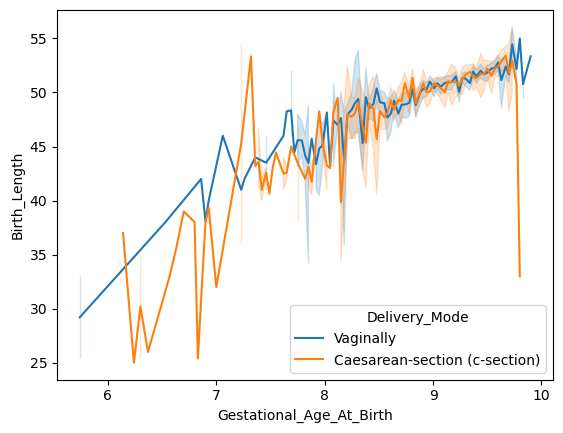

In [64]:
sns.lineplot(data=covid_preg, x="Gestational_Age_At_Birth", y="Birth_Length", hue="Delivery_Mode")

<Axes: xlabel='Gestational_Age_At_Birth', ylabel='Birth_Weight'>

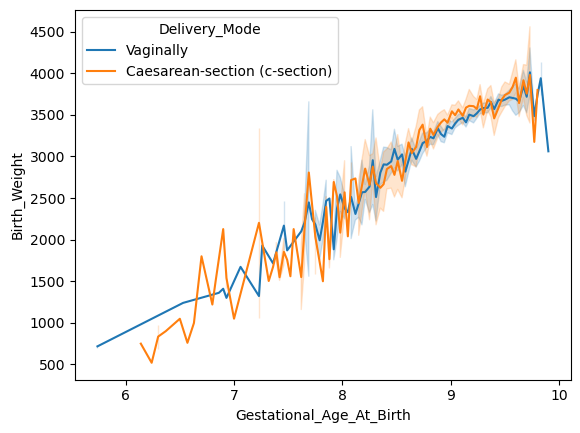

In [65]:
sns.lineplot(data=covid_preg, x="Gestational_Age_At_Birth", y="Birth_Weight", hue="Delivery_Mode")

<Axes: xlabel='Gestational_Age_At_Birth', ylabel='PROMIS_Anxiety'>

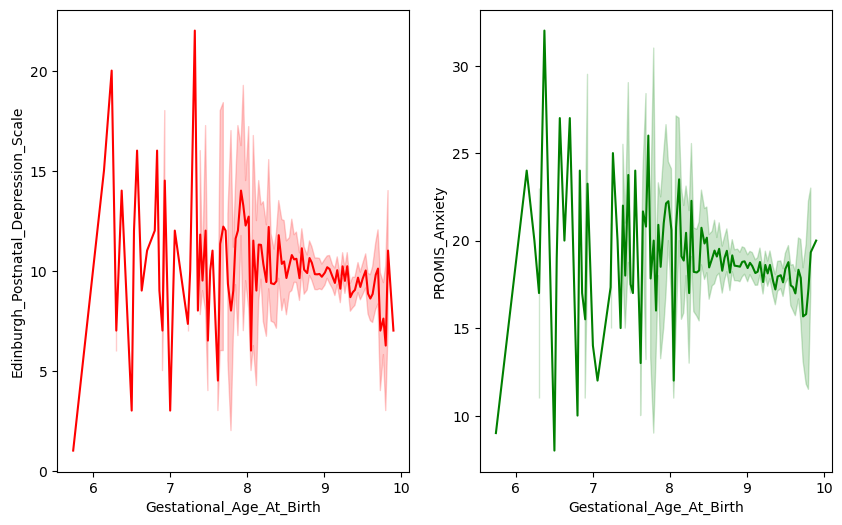

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(10,6))
sns.lineplot(data=covid_preg, x="Gestational_Age_At_Birth", y="Edinburgh_Postnatal_Depression_Scale",ax=axs[0],color='red')
sns.lineplot(data=covid_preg, x="Gestational_Age_At_Birth", y="PROMIS_Anxiety",ax=axs[1],color='green')

In [67]:
covid_preg.groupby('NICU_Stay')['Birth_Weight'].mean().reset_index()

,NICU_Stay,Birth_Weight
0,No,3455.886236
1,Yes,3029.739051


In [68]:
covid_preg.groupby('NICU_Stay')['Birth_Length'].mean().reset_index()

,NICU_Stay,Birth_Length
0,No,50.753651
1,Yes,48.214373


In [69]:
temp_data_1 = covid_preg[covid_preg['Weight_health']!= 'No Data Available']
temp_data_2 = covid_preg[covid_preg['Height_health']!= 'No Data Available']

In [70]:
temp_data_1.groupby('Weight_health')['Delivery_Mode'].value_counts().reset_index()

,Weight_health,Delivery_Mode,count
0,Healthy,Vaginally,3293
1,Healthy,Caesarean-section (c-section),1277
2,Unhealthy,Vaginally,609
3,Unhealthy,Caesarean-section (c-section),355


In [71]:
temp_data_1.groupby('NICU_Stay')['Weight_health'].value_counts().reset_index()

,NICU_Stay,Weight_health,count
0,No,Healthy,4236
1,No,Unhealthy,748
2,Yes,Healthy,332
3,Yes,Unhealthy,216


In [72]:
temp_data_2.groupby('Height_health')['Delivery_Mode'].value_counts().reset_index()

,Height_health,Delivery_Mode,count
0,Healthy,Vaginally,3765
1,Healthy,Caesarean-section (c-section),1552
2,Unhealthy,Vaginally,102
3,Unhealthy,Caesarean-section (c-section),61


In [73]:
temp_data_2.groupby('NICU_Stay')['Height_health'].value_counts().reset_index()

,NICU_Stay,Height_health,count
0,No,Healthy,4810
1,No,Unhealthy,128
2,Yes,Healthy,507
3,Yes,Unhealthy,35


In [74]:
temp_data_2.groupby('Maternal_Education')['Threaten_Life'].mean().reset_index().sort_values('Threaten_Life',ascending = False)

,Maternal_Education,Threaten_Life
3,Less than high school diploma,45.208333
0,College/trade school,44.426291
5,Undergraduate degree,41.809524
2,High school diploma,41.556738
4,Masters degree,39.262128
1,Doctoral Degree,37.825670


In [75]:
covid_preg.groupby(
['Maternal_Age','Household_Income','Maternal_Education'])['Edinburgh_Postnatal_Depression_Scale'].mean().reset_index().sort_values('Edinburgh_Postnatal_Depression_Scale', ascending = False).head(30)

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale
2644,34.3,"$20,000- $39,999",College/trade school,29.0
51,20.5,"$40,000-$69,999",College/trade school,29.0
2037,32.1,"$40,000-$69,999",High school diploma,28.0
4048,42.2,"$40,000-$69,999",College/trade school,28.0
992,28.2,"Less than $20, 000",College/trade school,27.0
27,19.6,"$20,000- $39,999",High school diploma,27.0
42,20.2,"Less than $20, 000",College/trade school,27.0
3274,36.7,"$40,000-$69,999",Less than high school diploma,26.0
627,26.5,"$20,000- $39,999",Undergraduate degree,26.0
1714,31.0,"$20,000- $39,999",High school diploma,26.0


In [76]:
#df = covid_preg.copy()
df = covid_preg[['Maternal_Age','Household_Income','Maternal_Education','Threaten_Life','Threaten_Baby_Danger','Threaten_Baby_Harm']]
df = df.dropna(how = 'all')

In [77]:
df.groupby(
['Maternal_Age','Household_Income','Maternal_Education']).agg({'Threaten_Life':'mean','Threaten_Baby_Danger':'mean','Threaten_Baby_Harm':'mean'}).reset_index().sort_values(by=['Threaten_Life','Threaten_Baby_Danger','Threaten_Baby_Harm'],ascending = False).head(30)

,Maternal_Age,Household_Income,Maternal_Education,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
54,20.6,"$20,000- $39,999",High school diploma,100.0,100.0,100.0
529,25.9,"$20,000- $39,999",College/trade school,100.0,100.0,100.0
882,27.8,"$100,000 -$124,999",Masters degree,100.0,100.0,100.0
905,27.9,"$100,000 -$124,999",College/trade school,100.0,100.0,100.0
940,28.0,"$40,000-$69,999",College/trade school,100.0,100.0,100.0
977,28.2,"$150,000 - $174,999",College/trade school,100.0,100.0,100.0
1475,30.1,"Less than $20, 000",College/trade school,100.0,100.0,100.0
1573,30.5,"$20,000- $39,999",High school diploma,100.0,100.0,100.0
2268,32.9,"$40,000-$69,999",High school diploma,100.0,100.0,100.0
2653,34.3,"$40,000-$69,999",High school diploma,100.0,100.0,100.0


In [78]:
covid_preg['Maternal_Age'].mean()

31.895560129373717

In [82]:
covid_preg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10292 entries, 0 to 10771
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Maternal_Age                          10203 non-null  float64
 1   Household_Income                      10068 non-null  object 
 2   Maternal_Education                    10139 non-null  object 
 3   Edinburgh_Postnatal_Depression_Scale  9598 non-null   float64
 4   PROMIS_Anxiety                        9566 non-null   float64
 5   Gestational_Age_At_Birth              6734 non-null   float64
 6   Delivery_Month                        6733 non-null   object 
 7   Delivery_Year                         6733 non-null   object 
 8   Birth_Length                          5480 non-null   float64
 9   Birth_Weight                          6078 non-null   float64
 10  Weight_health                         10292 non-null  object 
 11  Height_health       

In [102]:
#Hypothesis Testing (Chi squar testing)
sample_data = covid_preg[['Maternal_Age','NICU_Stay']]

In [105]:
sample_data['NICU_Stay'].head(10)

0      No
3      No
4      No
8      No
11     No
13     No
14    Yes
15     No
17     No
18    Yes
Name: NICU_Stay, dtype: object

In [104]:
sample_data=sample_data.dropna()

In [124]:
alpha = 0.3

(5519, 2)

In [125]:
No_Nicu = sample_data[sample_data['NICU_Stay'] == 'No']['Maternal_Age']
Yes_Nicu = sample_data[sample_data['NICU_Stay'] == 'Yes']['Maternal_Age']

In [135]:
t_stats , p_value = stats.ttest_ind(a=No_Nicu,b=Yes_Nicu, equal_var = False)
print('T_statistic :',t_stats,'P_value :',p_value)

T_statistic : -2.298689519095171 P_value : 0.021833843658900006
